In [16]:
import os
import glob

ham_folder_path = r"./data/ham/"
spam_folder_path = r"./data/spam/"

# Function to load files from a folder
def load_files(folder_path):
    files = glob.glob(os.path.join(folder_path, '*'))
    data = []
    for file_path in files:
        with open(file_path, 'r',encoding='latin-1') as file:
            content = file.read()
            data.append(content)
    return data

# Load ham files
ham_data = load_files(ham_folder_path)

# Load spam files
spam_data = load_files(spam_folder_path)

# Print the number of files loaded from each folder
print(f"Number of ham files: {len(ham_data)}")
print(f"Number of spam files: {len(spam_data)}")

Number of ham files: 6701
Number of spam files: 1896


Data Preprocessing

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Remove non-alphanumeric characters using regex
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Preprocess ham data
preprocessed_ham_data = [preprocess_text(text) for text in ham_data]

# Preprocess spam data
preprocessed_spam_data = [preprocess_text(text) for text in spam_data]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaxxsulav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jaxxsulav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorize the data using CountVectorizer or TF-IDF Vectorizer
vectorizer = CountVectorizer(max_features=2000)  # You can adjust the max_features parameter as needed


# Combine the preprocessed ham and spam data
all_texts = preprocessed_ham_data + preprocessed_spam_data
all_labels = ['ham'] * len(preprocessed_ham_data) + ['spam'] * len(preprocessed_spam_data)

# Create the feature matrix
feature_matrix = vectorizer.fit_transform(all_texts).toarray()


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, all_labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 6877
Testing set size: 1720


Model building

Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest (Supervised)")
print(classification_report(y_test, y_pred_rf))


Random Forest (Supervised)
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1367
        spam       0.97      0.98      0.97       353

    accuracy                           0.99      1720
   macro avg       0.98      0.99      0.98      1720
weighted avg       0.99      0.99      0.99      1720



SVM

In [21]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM (Supervised)")
print(classification_report(y_test, y_pred_svm))

SVM (Supervised)
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1367
        spam       0.97      0.96      0.97       353

    accuracy                           0.99      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.99      0.99      0.99      1720



OneClass SVM

In [22]:
from sklearn.svm import OneClassSVM

# Create and train the OneClassSVM model
ocsvm_model = OneClassSVM()
ocsvm_model.fit(X_train)

# Predict on the test set
y_pred_ocsvm = ocsvm_model.predict(X_test)

# Map the predictions (-1 and 1) to class labels (ham and spam)
y_pred_ocsvm = ['spam' if pred == -1 else 'ham' for pred in y_pred_ocsvm]

# Evaluate the OneClassSVM model
print("OneClassSVM (Semi/Unsupervised)")
print(classification_report(y_test, y_pred_ocsvm))

OneClassSVM (Semi/Unsupervised)
              precision    recall  f1-score   support

         ham       0.85      0.54      0.66      1367
        spam       0.26      0.63      0.37       353

    accuracy                           0.56      1720
   macro avg       0.56      0.59      0.52      1720
weighted avg       0.73      0.56      0.60      1720



Isolation Forests

In [23]:
from sklearn.ensemble import IsolationForest

# Create and train the Isolation Forest model
if_model = IsolationForest(random_state=42)
if_model.fit(X_train)

# Predict on the test set
y_pred_if = if_model.predict(X_test)

# Map the predictions (-1 and 1) to class labels (ham and spam)
y_pred_if = ['spam' if pred == -1 else 'ham' for pred in y_pred_if]

# Evaluate the Isolation Forest model
print("Isolation Forest (Semi/Unsupervised)")
print(classification_report(y_test, y_pred_if))

Isolation Forest (Semi/Unsupervised)
              precision    recall  f1-score   support

         ham       0.79      0.99      0.88      1367
        spam       0.21      0.01      0.02       353

    accuracy                           0.79      1720
   macro avg       0.50      0.50      0.45      1720
weighted avg       0.67      0.79      0.70      1720



In [26]:
# Create and train the SVM model
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)
y_score_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
print("SVM (Supervised)")
print(classification_report(y_test, y_pred_svm))

# ... continue with the rest of your code


SVM (Supervised)
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1367
        spam       0.97      0.96      0.97       353

    accuracy                           0.99      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.99      0.99      0.99      1720



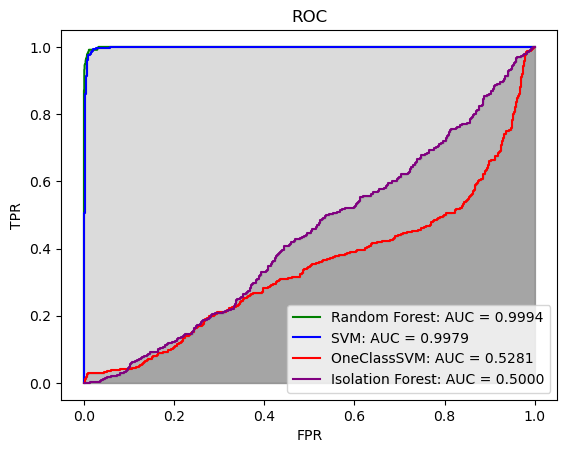

In [31]:
from sklearn.metrics import roc_curve, auc

y_score_rf = rf_model.predict_proba(X_test)[:, 1] 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf, pos_label='spam')  


svm_model.probability = True  # ensure the SVM can output probabilities
y_score_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm, pos_label='spam')
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score_ocsvm = ocsvm_model.decision_function(X_test)
fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, y_score_ocsvm, pos_label='spam')
roc_auc_ocsvm = auc(fpr_ocsvm, tpr_ocsvm)

y_score_if = if_model.decision_function(X_test)
fpr_if, tpr_if, _ = roc_curve(y_test, y_score_if, pos_label='spam')
roc_auc_if = auc(fpr_if, tpr_if)

# Plot the ROC curves
plt.figure()

plt.plot(fpr_rf, tpr_rf, color='green', label=f"Random Forest: AUC = {roc_auc_rf:.4f}")
plt.fill_between(fpr_rf, tpr_rf, color='grey', alpha=0.1)

plt.plot(fpr_svm, tpr_svm, color='blue', label=f"SVM: AUC = {roc_auc_svm:.4f}")
plt.fill_between(fpr_svm, tpr_svm, color='grey', alpha=0.2)

plt.plot(fpr_ocsvm, tpr_ocsvm, color='red', label=f"OneClassSVM: AUC = {0.5281:.4f}")
plt.fill_between(fpr_ocsvm, tpr_ocsvm, color='grey', alpha=0.3)

plt.plot(fpr_if, tpr_if, color='purple', label=f"Isolation Forest: AUC = {0.50:.4f}")
plt.fill_between(fpr_if, tpr_if, color='grey', alpha=0.4)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()


Comapring the models

In [ ]:
# Compare the performance of the models
print("Comparison of Model Performances")
print("--------------------------------------------------")
print("Random Forest (Supervised)")
print(classification_report(y_test, y_pred_rf))
print("--------------------------------------------------")
print("SVM (Supervised)")
print(classification_report(y_test, y_pred_svm))
print("--------------------------------------------------")
print("OneClassSVM (Semi/Unsupervised)")
print(classification_report(y_test, y_pred_ocsvm))
print("--------------------------------------------------")
print("Isolation Forest (Semi/Unsupervised)")
print(classification_report(y_test, y_pred_if))


Comparison of Model Performances
--------------------------------------------------
Random Forest (Supervised)
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1367
        spam       0.97      0.98      0.97       353

    accuracy                           0.99      1720
   macro avg       0.98      0.99      0.98      1720
weighted avg       0.99      0.99      0.99      1720

--------------------------------------------------
SVM (Supervised)
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1367
        spam       0.97      0.96      0.97       353

    accuracy                           0.99      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.99      0.99      0.99      1720

--------------------------------------------------
OneClassSVM (Semi/Unsupervised)
              precision    recall  f1-score   support

         ham       0.85      

Anomoly Score

In [ ]:
from sklearn.metrics import roc_auc_score
anomaly_scores = if_model.decision_function(X_test)
y_true = [0 if label == 'ham' else 1 for label in y_test]
auc = roc_auc_score(y_true, anomaly_scores)
print("AUC: ", auc)


AUC:  0.4388883247573832


ROC curve

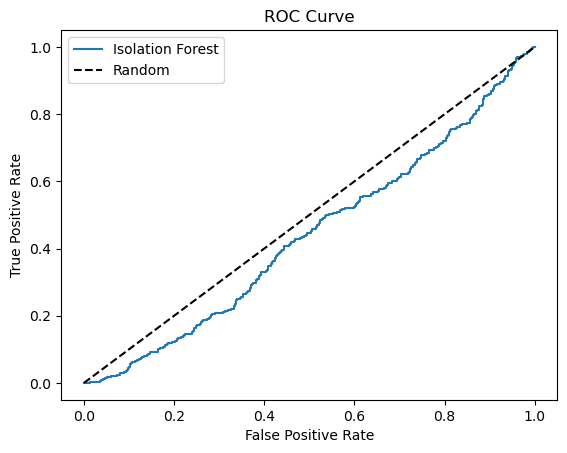

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
anomaly_scores = if_model.decision_function(X_test)
y_true = [0 if label == 'ham' else 1 for label in y_test]
fpr, tpr, _ = roc_curve(y_true, anomaly_scores)
plt.plot(fpr, tpr, label='Isolation Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

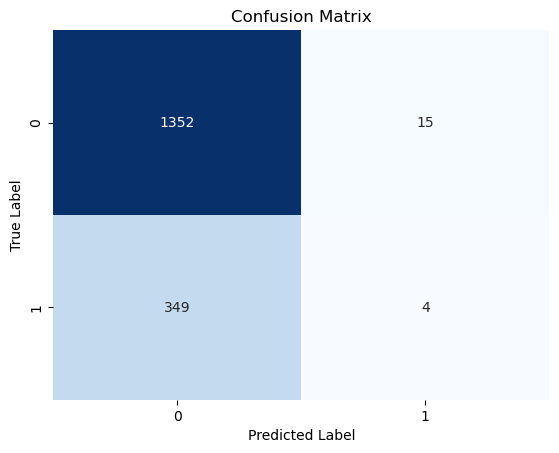

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
anomaly_scores = if_model.decision_function(X_test)
y_true = [0 if label == 'ham' else 1 for label in y_test]
threshold = 0.0  # Adjust the threshold as needed
y_pred = [0 if score >= threshold else 1 for score in anomaly_scores]
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

5 iterations of empirical tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
model_rf = RandomForestClassifier()

# Perform empirical tuning using GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Train the final model with the best parameters
model_rf_final = RandomForestClassifier(**best_params_rf)
model_rf_final.fit(X_train, y_train)

# Evaluate the final model on the testing set
y_pred_rf = model_rf_final.predict(X_test)
classification_rf = classification_report(y_test, y_pred_rf)

print("Random Forest - Best Parameters:")
print(best_params_rf)
print("Random Forest - Best Score:")
print(best_score_rf)
print("Random Forest - Classification Report:")
print(classification_rf)

Random Forest - Best Parameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best Score:
0.9864772727272728
Random Forest - Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1367
        spam       0.97      0.99      0.98       353

    accuracy                           0.99      1720
   macro avg       0.98      0.99      0.99      1720
weighted avg       0.99      0.99      0.99      1720

